# Support Vector Machine (SVM)

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
dataset = pd.read_csv('credit_card_defaults.csv')
X_original = dataset.iloc[1:, 1:-1].values
y_orignal = dataset.iloc[1:, -1].values

X = dataset.iloc[1:, 1:-1].values
y = dataset.iloc[1:, -1].values


In [25]:
print(X[0,:])

print(y[1:3])


['20000' '2' '2' '1' '24' '2' '2' '-1' '-1' '-2' '-2' '3913' '3102' '689'
 '0' '0' '0' '0' '689' '0' '0' '0' '0']
['1' '0']


In [6]:
from ucimlrepo import fetch_ucirepo
creditData = fetch_ucirepo(id=144)
print(f'variables {creditData.variables}')





variables            name     role         type     demographic  \
0    Attribute1  Feature  Categorical            None   
1    Attribute2  Feature      Integer            None   
2    Attribute3  Feature  Categorical            None   
3    Attribute4  Feature  Categorical            None   
4    Attribute5  Feature      Integer            None   
5    Attribute6  Feature  Categorical            None   
6    Attribute7  Feature  Categorical           Other   
7    Attribute8  Feature      Integer            None   
8    Attribute9  Feature  Categorical  Marital Status   
9   Attribute10  Feature  Categorical            None   
10  Attribute11  Feature      Integer            None   
11  Attribute12  Feature  Categorical            None   
12  Attribute13  Feature      Integer             Age   
13  Attribute14  Feature  Categorical            None   
14  Attribute15  Feature  Categorical           Other   
15  Attribute16  Feature      Integer            None   
16  Attribute17  Feat

In [15]:
print(X_original)

[['20000' '2' '2' ... '0' '0' '0']
 ['120000' '2' '2' ... '1000' '0' '2000']
 ['90000' '2' '2' ... '1000' '1000' '5000']
 ...
 ['30000' '1' '2' ... '4200' '2000' '3100']
 ['80000' '1' '3' ... '1926' '52964' '1804']
 ['50000' '1' '2' ... '1000' '1000' '1000']]


## Splitting the dataset into the Training set and Test set

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [10]:
print(X_train)

[['130000' '2' '1' ... '438' '780' '0']
 ['130000' '2' '3' ... '1536' '2451' '2659']
 ['140000' '1' '3' ... '2600' '2300' '5300']
 ...
 ['130000' '2' '3' ... '4100' '0' '5000']
 ['50000' '2' '3' ... '1000' '1000' '500']
 ['140000' '2' '1' ... '2000' '2200' '2000']]


In [19]:
print(y_train)

['0' '0' '1' ... '0' '0' '0']


In [27]:
print(X_test)

[['20000' '1' '1' ... '1600' '0' '644']
 ['20000' '2' '2' ... '0' '1000' '0']
 ['230000' '2' '1' ... '0' '0' '0']
 ...
 ['50000' '2' '3' ... '169' '300' '1200']
 ['20000' '2' '2' ... '1000' '1000' '650']
 ['130000' '1' '2' ... '3465' '3627' '5000']]


In [7]:
print(y_test)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1]


## Feature Scaling

In [28]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

### How to identify Outliers
# Detect outliers using Z-score method (Z-score > 3 is an outlier)


In [ ]:
from scipy import stats
z_scores = np.abs(stats.zscore(X_scaled))
outliers = np.where(z_scores > 3)

In [15]:
print(X_train[2,:])
print(X_train_smote[2,:])


[-0.21199414 -1.22474487  1.45760949 -1.06020505  0.27692967  1.78064697
  1.76357912  1.78992809  1.88780599  1.99071792  1.9793713   0.8122214
  1.16318413  1.16471287  1.44762024  1.58865876  1.62225175  1.00945389
 -0.24914952  0.28607234 -0.14310391 -0.16477056  0.00578357]
[-0.21199414 -1.22474487  1.45760949 -1.06020505  0.27692967  1.78064697
  1.76357912  1.78992809  1.88780599  1.99071792  1.9793713   0.8122214
  1.16318413  1.16471287  1.44762024  1.58865876  1.62225175  1.00945389
 -0.24914952  0.28607234 -0.14310391 -0.16477056  0.00578357]


In [10]:
print(X_test)

[[-0.80480212  0.50496393]
 [-0.01254409 -0.5677824 ]
 [-0.30964085  0.1570462 ]
 [-0.80480212  0.27301877]
 [-0.30964085 -0.5677824 ]
 [-1.10189888 -1.43757673]
 [-0.70576986 -1.58254245]
 [-0.21060859  2.15757314]
 [-1.99318916 -0.04590581]
 [ 0.8787462  -0.77073441]
 [-0.80480212 -0.59677555]
 [-1.00286662 -0.42281668]
 [-0.11157634 -0.42281668]
 [ 0.08648817  0.21503249]
 [-1.79512465  0.47597078]
 [-0.60673761  1.37475825]
 [-0.11157634  0.21503249]
 [-1.89415691  0.44697764]
 [ 1.67100423  1.75166912]
 [-0.30964085 -1.37959044]
 [-0.30964085 -0.65476184]
 [ 0.8787462   2.15757314]
 [ 0.28455268 -0.53878926]
 [ 0.8787462   1.02684052]
 [-1.49802789 -1.20563157]
 [ 1.07681071  2.07059371]
 [-1.00286662  0.50496393]
 [-0.90383437  0.30201192]
 [-0.11157634 -0.21986468]
 [-0.60673761  0.47597078]
 [-1.6960924   0.53395707]
 [-0.11157634  0.27301877]
 [ 1.86906873 -0.27785096]
 [-0.11157634 -0.48080297]
 [-1.39899564 -0.33583725]
 [-1.99318916 -0.50979612]
 [-1.59706014  0.33100506]
 

## Training the SVM model on the Training set

In [ ]:
from sklearn.svm import SVC
classifierLinear = SVC(kernel = 'linear', random_state = 0)
classifierLinear.fit(X_train_smote, y_train_smote) # first run took 35 seconds 
# 1 min 49 seconds second run 

SVC(kernel='linear', random_state=0)

In [33]:
from sklearn.svm import LinearSVC
classifierLinear1 = LinearSVC(random_state = 42, class_weight='balanced', dual=False)
classifierLinear1.fit(X_train_smote, y_train_smote) # first run took 35 seconds 

y_pred1 = classifierLinear1.predict(X_test)
accuracyScoreLinear1 = accuracy_score(y_test, y_pred1)
print(accuracyScoreLinear1)

0.6837333333333333


In [30]:
classifierSigmoid = SVC(kernel = 'sigmoid', random_state = 0)
classifierSigmoid.fit(X_train_smote, y_train_smote) # first run took 1min 4.2 secs 

SVC(kernel='sigmoid', random_state=0)

In [ ]:
classifierRbf = SVC(kernel = 'rbf', random_state = 0)
classifierRbf.fit(X_train_smote, y_train_smote) # first run took 52 seconds 


SVC(random_state=0)

## Predicting a new result

In [ ]:
#print(classifier.predict(sc.transform([[30,87000]])))

[0]


## Predicting the Test set results

In [21]:
y_pred = classifierLinear.predict(X_test)
y_pred_sigmoid = classifierSigmoid.predict(X_test)
y_pred_rbf = classifierRbf.predict(X_test)


#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

## Making the Confusion Matrix

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracyScoreLinear = accuracy_score(y_test, y_pred)
accuracyScoreSigmoid = accuracy_score(y_test, y_pred_sigmoid)
accuracyScoreRbf = accuracy_score(y_test, y_pred_rbf)

print(f'accuracyScoreLinear {accuracyScoreLinear} accuracyScoreSigmoid {accuracyScoreSigmoid} accuracyScoreRbf {accuracyScoreRbf}')

[[4757 1111]
 [ 727  905]]
accuracyScoreLinear 0.7549333333333333 accuracyScoreSigmoid 0.5649333333333333 accuracyScoreRbf 0.7844


## Classification Report

In [9]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

# Optional: Classification Report (includes precision, recall, f1-score)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

[[5726  142]
 [1244  388]]
0.8152

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.98      0.89      5868
           1       0.73      0.24      0.36      1632

    accuracy                           0.82      7500
   macro avg       0.78      0.61      0.63      7500
weighted avg       0.80      0.82      0.78      7500



## Visualizing the Confusion Matrix

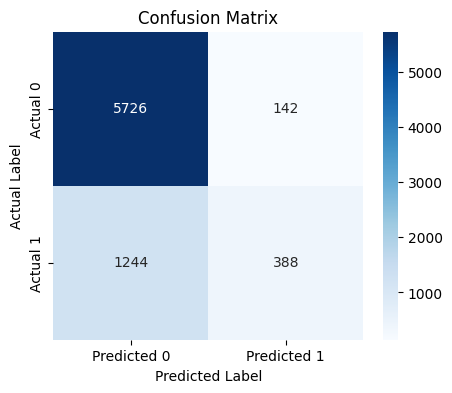

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

## Visualising the Training set results

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(['#FA8072', '#1E90FF']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(['#FA8072', '#1E90FF'])(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

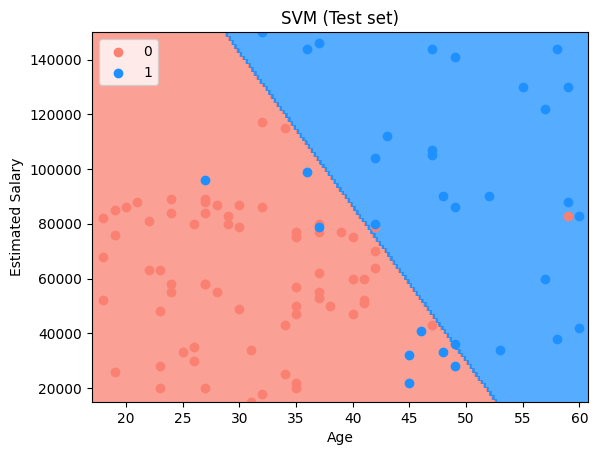

In [16]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
# Create a grid of points
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.25),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.25)
)
# Predict for each point on the grid
Z = classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape)
# Plot the decision boundary
plt.contourf(X1, X2, Z, alpha=0.75, cmap = ListedColormap(['#FA8072', '#1E90FF']) )
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
# Define colors for scatter plot
colors = ['#FA8072', '#1E90FF']
# Plot the test set points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0], X_set[y_set == j, 1],
        color=colors[i], label=j
    )
# Add titles and labels
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
# load all necessary libraries for the pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline  
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Define evaluation metrics
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    roc_auc_score, 
    f1_score
)

# Initialize models with class weights


# 1. Logistic Regression Pipeline
lr_pipeline = make_pipeline(
    preprocessor,
    SMOTE(random_state=42),  # Handle class imbalance
    LogisticRegression(class_weight='balanced', max_iter=1000)
)

# 2. SVM Pipeline
svm_pipeline = make_pipeline(
    preprocessor,
    SMOTE(random_state=42),
    SVC(class_weight='balanced', probability=True)  # probability=True for ROC-AUC
)

# 3. Random Forest Pipeline
rf_pipeline = make_pipeline(
    preprocessor,
    RandomForestClassifier(class_weight='balanced')
)

# Train all models
models = {
    'Logistic Regression': lr_pipeline,
    'SVM': svm_pipeline,
    'Random Forest': rf_pipeline
}